In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from packages.utils import standard_OHE



In [3]:
color_blue = "#1a559e"
color_blue_vivid = "#0070c0"
color_blue_light = "dodgerblue"
color_pink = "#e71d71"
color_black = "black"
color_gold = "#FFD700"
color_orange = "orange"
color_red = "darkred"

In [4]:
# import the dataset
df = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

# Concatenate the two datasets
df = pd.concat([df_train, df], ignore_index=True, sort=False)
df = df.dropna()
df = df.drop([ 'id', 'Unnamed: 0'], axis=1)
df.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    129487 no

In [6]:
df.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64

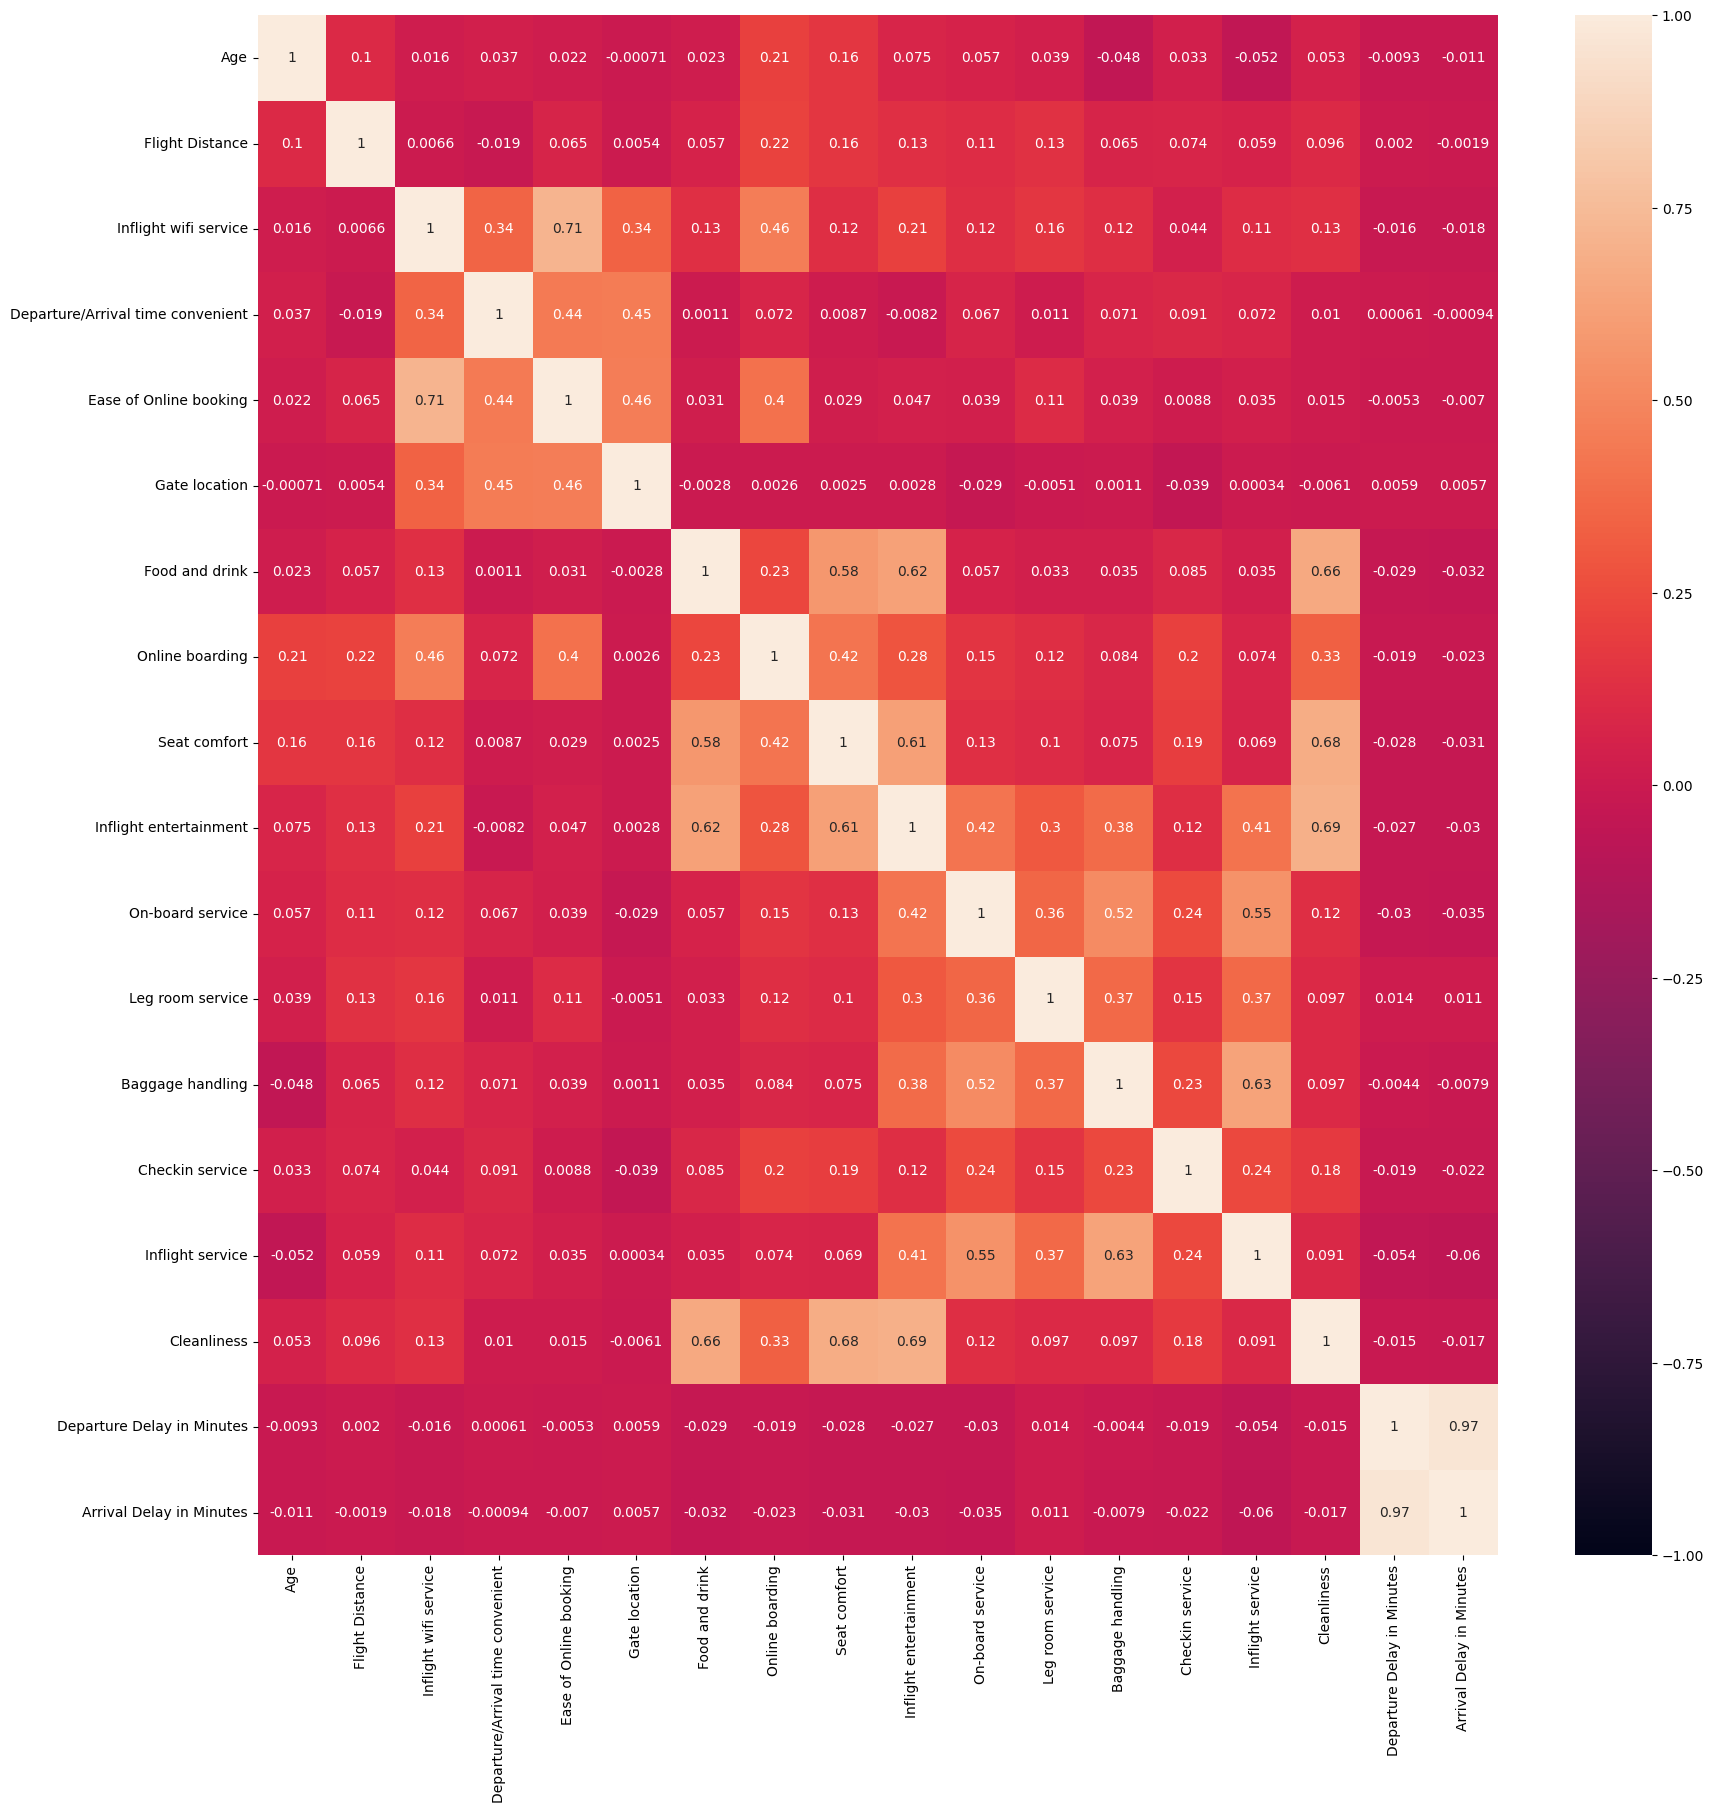

In [7]:
# Select only the numeric columns
df_num = df.select_dtypes(include = ['float64', 'int64'])

# Compute the correlation matrix
corr = df_num.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
plt.show()


In [8]:
df.describe(include='all')


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129487,129487,129487.000000,129487,129487,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,65703,105773,NaN,89445,61990,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73225
mean,NaN,NaN,39.428761,NaN,NaN,1190.210662,2.728544,3.057349,2.756786,2.976909,...,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129,NaN
std,NaN,NaN,15.117597,NaN,NaN,997.560954,1.329235,1.526787,1.401662,1.278506,...,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [9]:
df = df[['Cleanliness',
             'Food and drink',
             'Seat comfort',
             'Online boarding',
             'Inflight entertainment',
             'Ease of Online booking',
             'Departure/Arrival time convenient',
             # 'Gate location',
             # 'Inflight wifi service',
             # 'On-board service',
             # 'Class',
             # 'Gender',
             'Customer Type',

             'Type of Travel',
             'satisfaction',
             ]]
df

,Cleanliness,Food and drink,Seat comfort,Online boarding,Inflight entertainment,Ease of Online booking,Departure/Arrival time convenient,Customer Type,Type of Travel,satisfaction
0,5,5,5,3,5,3,4,Loyal Customer,Personal Travel,neutral or dissatisfied
1,1,1,1,3,1,3,2,disloyal Customer,Business travel,neutral or dissatisfied
2,5,5,5,5,5,2,2,Loyal Customer,Business travel,satisfied
3,2,2,2,2,2,5,5,Loyal Customer,Business travel,neutral or dissatisfied
4,3,4,5,5,3,3,3,Loyal Customer,Business travel,satisfied
...,...,...,...,...,...,...,...,...,...,...
129875,4,4,4,3,4,3,3,disloyal Customer,Business travel,neutral or dissatisfied
129876,4,4,4,4,4,4,4,Loyal Customer,Business travel,satisfied
129877,2,2,2,1,2,1,5,Loyal Customer,Personal Travel,neutral or dissatisfied
129878,4,4,4,4,4,3,3,Loyal Customer,Business travel,satisfied


In [10]:
df = standard_OHE(df)


Categorical cols:[]
Binary cols:['Customer Type', 'Type of Travel', 'satisfaction']


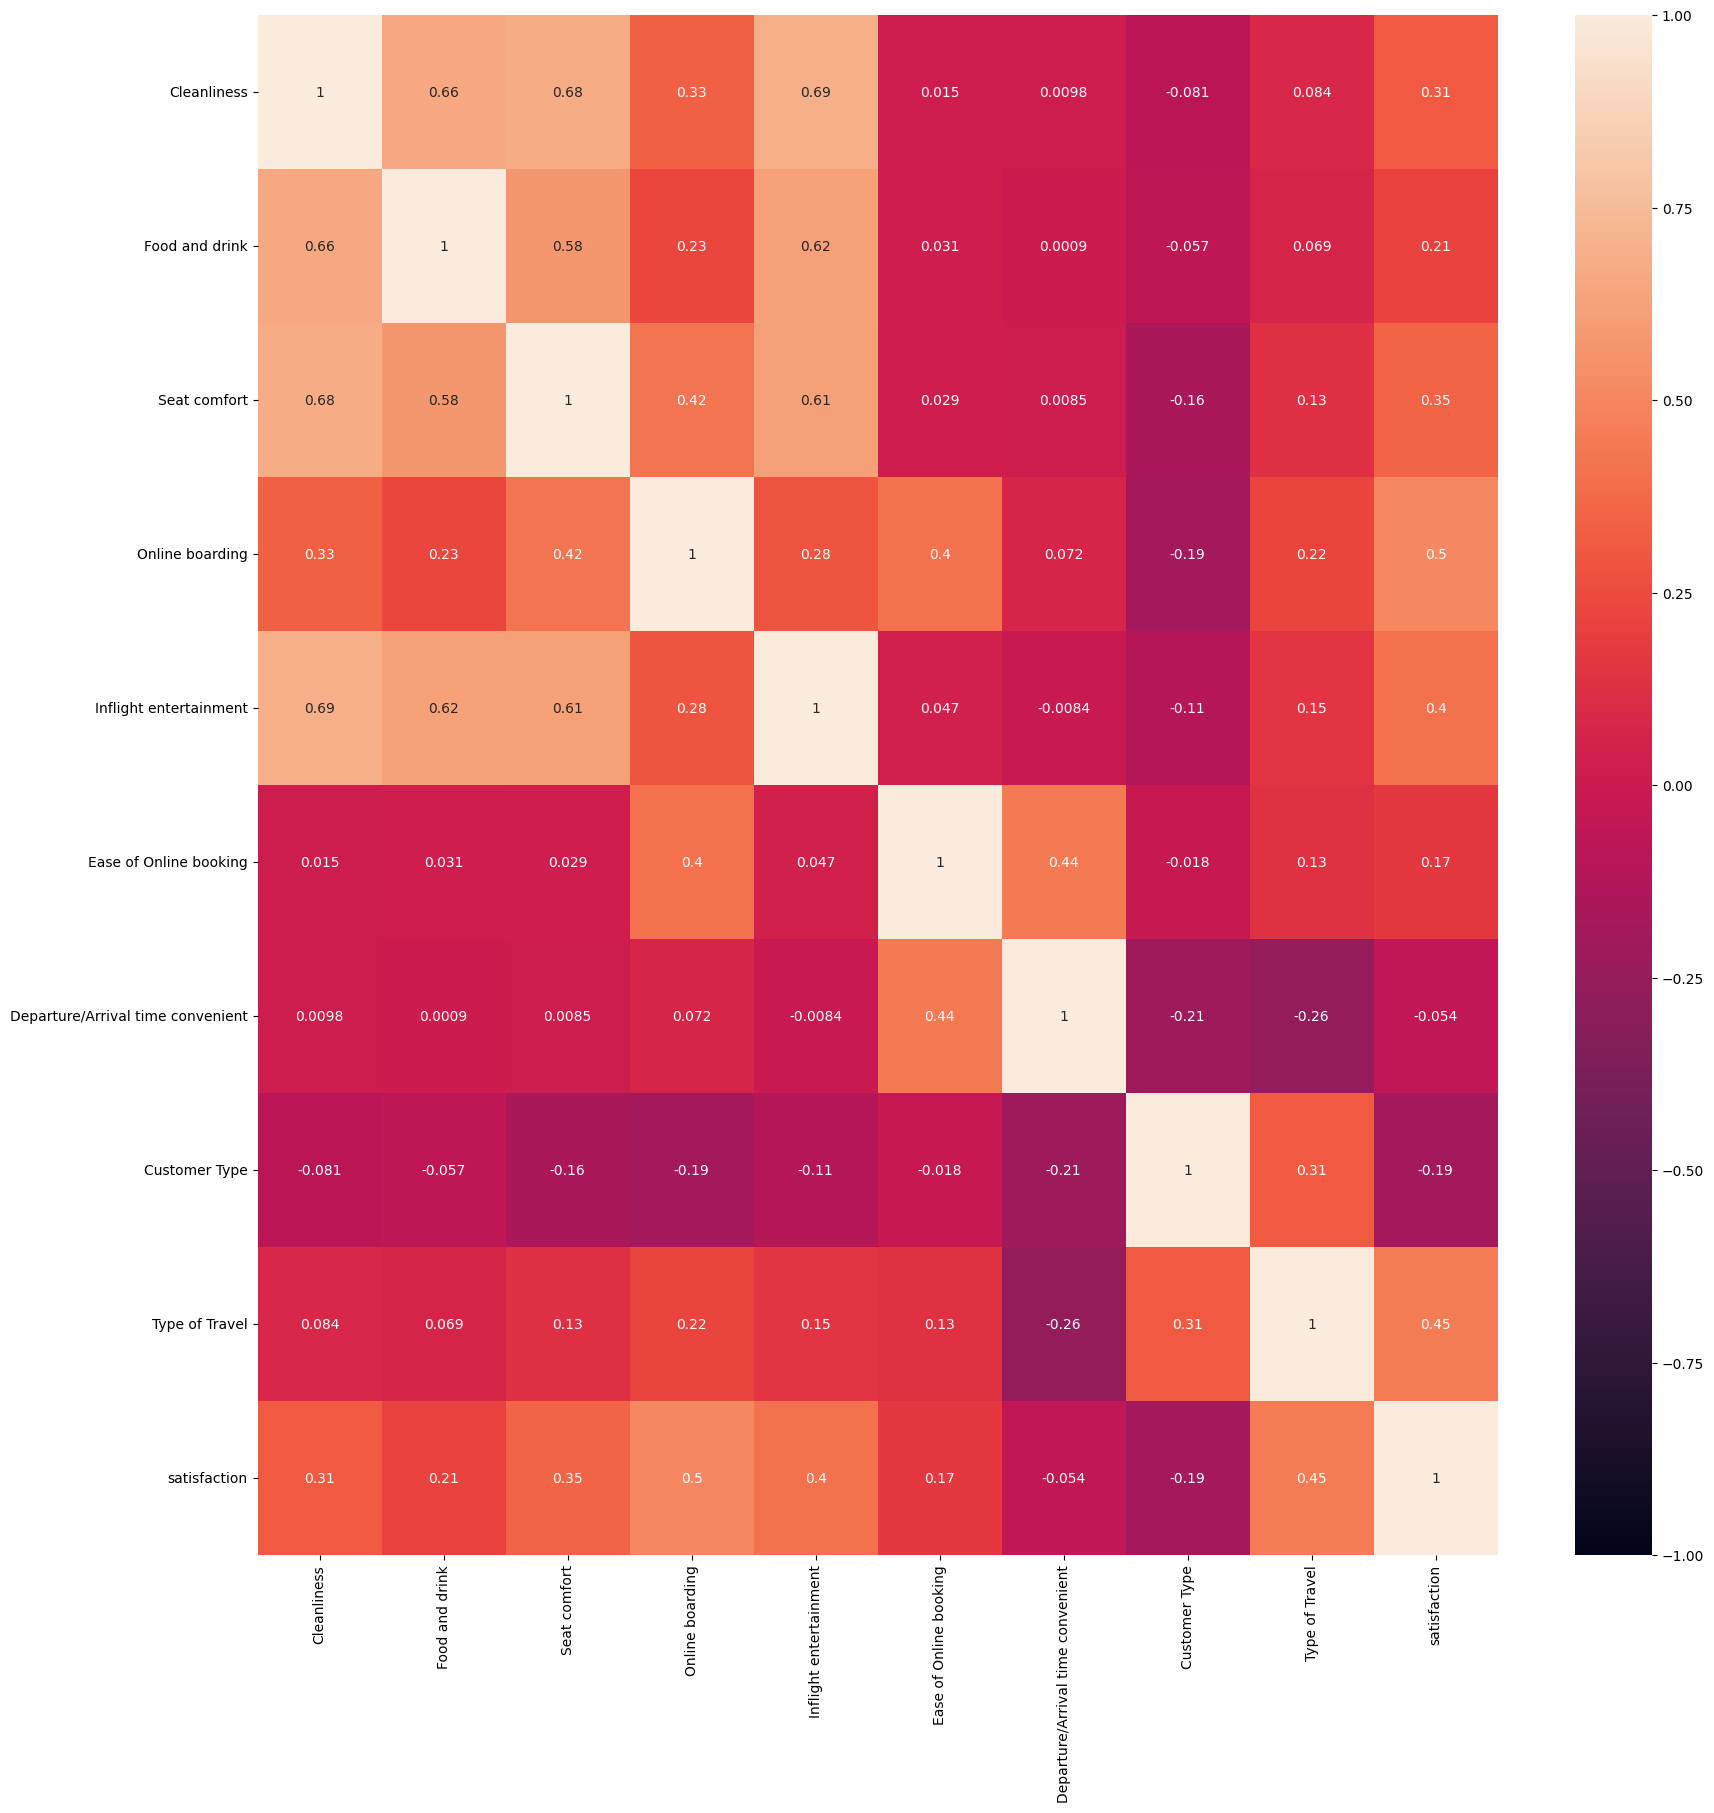

In [11]:
# Select only the numeric columns
df_num = df.select_dtypes(include = ['float64', 'int64'])

# Compute the correlation matrix
corr = df_num.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
plt.show()


In [12]:
# Select numerical columns
y_col = 'satisfaction'

# Select numerical columns
df = df.select_dtypes(include=[np.number])

# Standardize the data ----> Very impo for PCA!
scaler = StandardScaler()

# Standardize the data
df_standardized = scaler.fit_transform(df.drop(y_col, axis=1))
df_standardized = pd.DataFrame(df_standardized, columns=df.columns.drop(y_col))
y = df[y_col]
df_standardized.head()


,Cleanliness,Food and drink,Seat comfort,Online boarding,Inflight entertainment,Ease of Online booking,Departure/Arrival time convenient,Customer Type,Type of Travel
0,1.304413,1.349905,1.181343,-0.187020,1.230406,0.173475,0.617516,-0.473408,-1.494894
1,-1.740773,-1.657795,-1.851093,-0.187020,-1.767726,0.173475,-0.692454,2.112341,0.668944
2,1.304413,1.349905,1.181343,1.293749,1.230406,-0.539999,-0.692454,-0.473408,0.668944
3,-0.979476,-0.905870,-1.092984,-0.927405,-1.018193,1.600423,1.272501,-0.473408,0.668944
4,-0.218180,0.597980,1.181343,1.293749,-0.268660,0.173475,-0.037469,-0.473408,0.668944


In [13]:
# Fit the PCA
pca = PCA(n_components=df_standardized.shape[1])
pca.fit(df_standardized)

# Transform the data
x_new_cols = df_standardized.columns
x_new = pca.fit_transform(df_standardized)


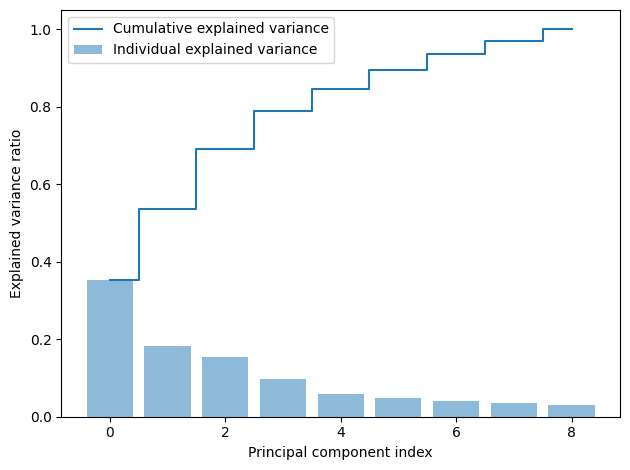

In [14]:
# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
# Find index where cumulative explained variance is greater than 0.9
desidered_explained_variance = 0.75
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Number of components explaining 75% of variance: {index_selected}')


Number of components explaining 75% of variance: 4


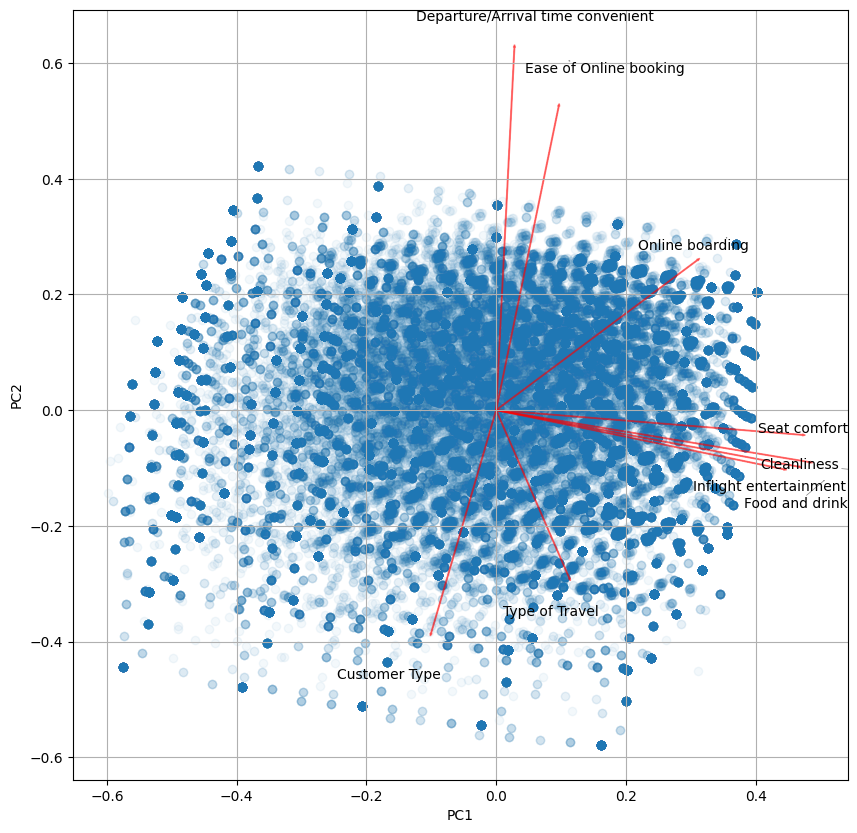

In [16]:
from adjustText import adjust_text

def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.figure(figsize=(10, 10))
    plt.scatter(xs * scalex, ys * scaley, alpha=0.05)
    
    texts = []
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        text = plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='black', ha='center', va='center')
        texts.append(text)
    
    # plt.xlim(-1, 1)
    # plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))


#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), x_new_cols)
plt.show()

# Graphs meaning
 The graphical analysis aims to understand which variables influence each principal component:

- The code loops through each principal component up to index_selected to create individual plots.
- It calculates the standard deviation of the absolute values of the sorted loadings.
- The bars in the plot are colored based on whether the loading is above or below the standard deviation.



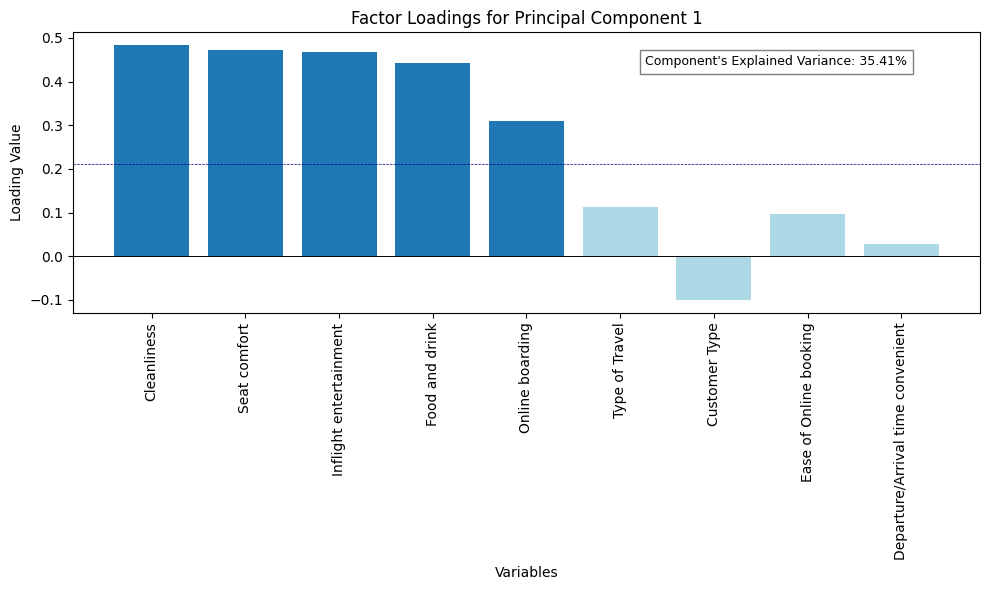

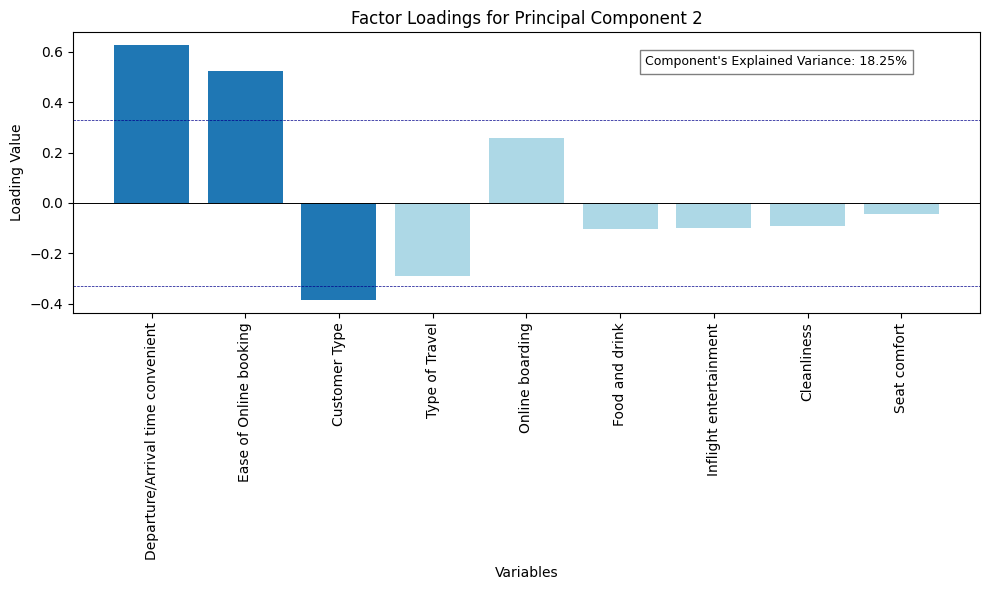

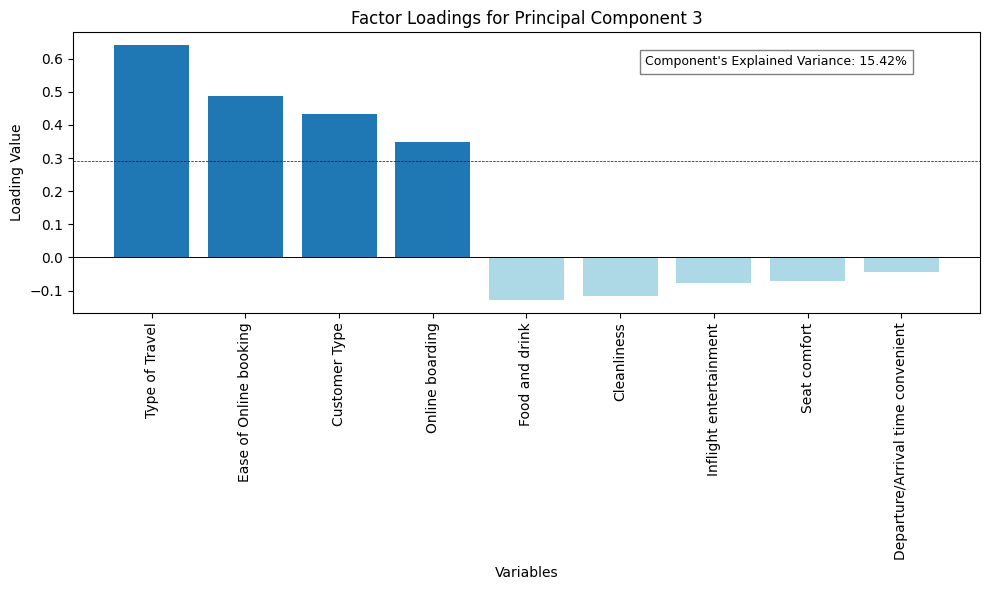

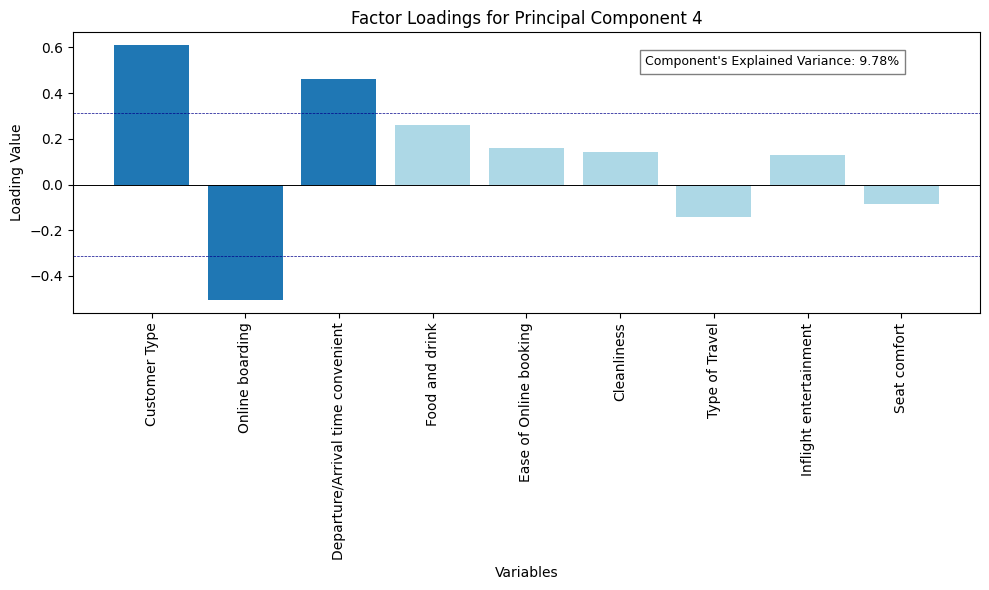

In [17]:
loadings = pca.components_.T

# Plotting the components to gain an explained variance threshold before defined
for i in range(index_selected): # range(loadings.shape[1]) to plot all components
    sorted_idx = np.argsort(abs(loadings[:, i]))[::-1]
    sorted_loadings = loadings[sorted_idx, i]
    vars = x_new_cols[sorted_idx]
    std_loading = np.std(sorted_loadings)
    
    # Colors based on comparison with the mean
    standart_blue = '#1f77b4'
    colors = [standart_blue if abs(loading) >= std_loading else 'lightblue' for loading in sorted_loadings]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_loadings)), sorted_loadings, color=colors)
    plt.title(f'Factor Loadings for Principal Component {i+1}')
    plt.xticks(range(len(sorted_loadings)), vars, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Loading Value')
    plt.axhline(std_loading, color='darkblue', linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=0.7)

    if sorted_loadings.min() < std_loading * -1:
        plt.axhline(-std_loading, color='darkblue', linestyle='--', linewidth=0.5)
        
    explained_variance = exp_var_pca[i] * 100  # convert to percentage
    textstr = f"Component's Explained Variance: {explained_variance:.2f}%"
    # Place the text box in the upper left corner
    plt.gcf().text(0.65, 0.9, textstr, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    plt.tight_layout()
    plt.show()

In [18]:
X = df_standardized

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy


0.8371741740578643

In [19]:
# Make regression model on PCA
X = x_new[:, :index_selected]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

# Calculate the accuracy
new_accuracy = metrics.accuracy_score(y_test, y_pred)
new_accuracy


0.8358185832139122

In [20]:
# Calculate how much better the original model is compared to the PCA model
improvement_percentage = ((accuracy - new_accuracy) / new_accuracy) * 100
print(f'Original model accuracy: {accuracy:.4f}')
print(f'PCA model accuracy: {new_accuracy:.4f}')
print(f'Accuracy improvement without PCA: {improvement_percentage:.2f}%')


Original model accuracy: 0.8372
PCA model accuracy: 0.8358
Accuracy improvement without PCA: 0.16%
